### Importation des bilbliothèques

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import cv2
import time
from skimage import color, transform
from skimage.feature import hog

import joblib

In [9]:
positive_patches_shape = (62, 47)

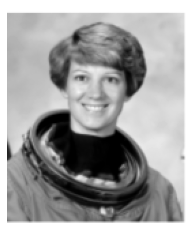

In [22]:
test_image = cv2.imread('img/astronaut.png') 
test_image = color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.5)
test_image = test_image[:160, 20:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [23]:
def sliding_window(img, patch_size,
                   istep=4, jstep=4, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch

### Extraction des patches

(450, 1215)

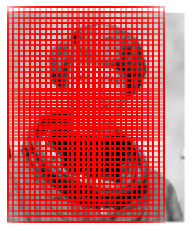

In [24]:
indices, patches = zip(*sliding_window(test_image, positive_patches_shape, scale=1.0))

indices = np.array(indices)

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches_shape
indices = np.array(indices)

for i, j in indices:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
            
patches_hog = np.array([hog(patch) for patch in patches])
patches_hog.shape

### Prédiction

In [20]:
# Chargement du modèle
filename = 'temp_model.sav'
loaded_model = joblib.load(filename)

# Prédictions
labels = loaded_model.predict(patches_hog)
print("{} zones positives trouvées.".format(labels.sum()))

12.0 zones positives trouvées.


### Affichage des résultats

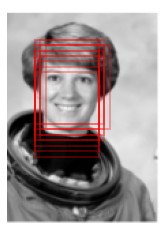

In [21]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches_shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))